## Perceptron

Perceptron is a relatively simple binary classification model, and it is the basis of neural network and support vector machine. The perceptron is designed to learn a linear separating hyperplane that divides the input data into +1/-1, so overall the perceptron is a linear model. Perceptron works if and only if the data is linearly separated.

Assuming that the input $x$ represents the feature vector of instance, and output $y=(+1, -1)$ is the category of instance. Then the perceptron defines the mapping function from input to output as follows:
$$
f(x) = \operatorname{sign}(w*x +b)
$$

The sign function is:
$$
\operatorname{sign}(x)= \begin{cases}+1, & x \geq 0 \\ -1, & x<0\end{cases}
$$

$w$ and $b$ are the perceptron model parameters, which are also things that the perceptron needs to learn. The linear equation $w*x+b=0$ formed by $w$ and $b$ is a linear separating hyperplane. 

The training goal of perceptron is to find the linear separating hyperplane. So its loss function is defined as follow:
$$
L(w,b) = - \sum _{x_{i} \in M} y_{i}(w*x_{i}+b)
$$

To optimize this loss function, gradient descent can be used to update the parameters to minimize the loss function. Calculate the gradient of the loss function with respect to parameters $w$ and $b$ as follows:
$$
\begin{gathered}
\nabla_{w} L(w, b)=-\sum_{x_{i} \in M} y_{i} x_{i} \\
\nabla_{b} L(w, b)=-\sum_{x_{i} \in M} y_{i}
\end{gathered}
$$

It can be seen from the above that the complete perceptron algorithm includes parameter initialization, and judges whether it is misclassified for each data point. If it is misclassified, the hyperplane parameters are updated according to the gradient descent method until there are no misclassified points.

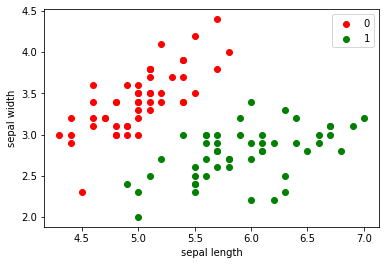

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], c='red', label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], c='green', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width') 
plt.legend()
plt.show()

In [3]:
df

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [4]:
# take 2 columns of data and switch their labels into 1/-1
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i==1 else -1 for i in y])

In [5]:
# initialize parameters
def initilize_with_zeros(dim):
    w = np.zeros(dim) 
    b = 0.0
    return w, b

In [6]:
# define sign function
def sign(x, w, b):
    return np.dot(x,w)+b

In [8]:
# define perpectron training function
def train(X_train, y_train, learning_rate):
    w, b = initilize_with_zeros(X_train.shape[1])
    # initialize the misclassification
    is_wrong = False
    while not is_wrong:
        wrong_count = 0
        for i in range(len(X_train)):
            X = X_train[i]
            y = y_train[i]
            # if there is misclassification, update the parameters until no misclassification exits
            if y*sign(X, w, b) <= 0:
                w = w + learning_rate*np.dot(y, X) 
                b = b + learning_rate*y 
                wrong_count += 1
        if wrong_count == 0:
            is_wrong = True
            print('There is no misclassification!')

        # save the updated parameters
        params = {'w': w, 'b': b}

    return params

In [9]:
# train the data
params = train(X, y, 0.01) 
params

There is no missclassification!


{'w': array([ 0.79 , -1.007]), 'b': -1.2400000000000009}

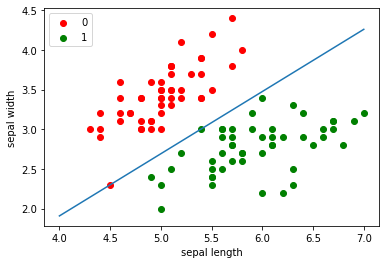

In [11]:
x_points = np.linspace(4, 7, 10)
y_hat = -(params['w'][0]*x_points + params['b'])/params['w'][1]
plt.plot(x_points, y_hat)

plt.scatter(data[:50, 0], data[:50, 1], color='red', label='0')
plt.scatter(data[50:100, 0], data[50:100, 1], color='green', label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()
plt.show()